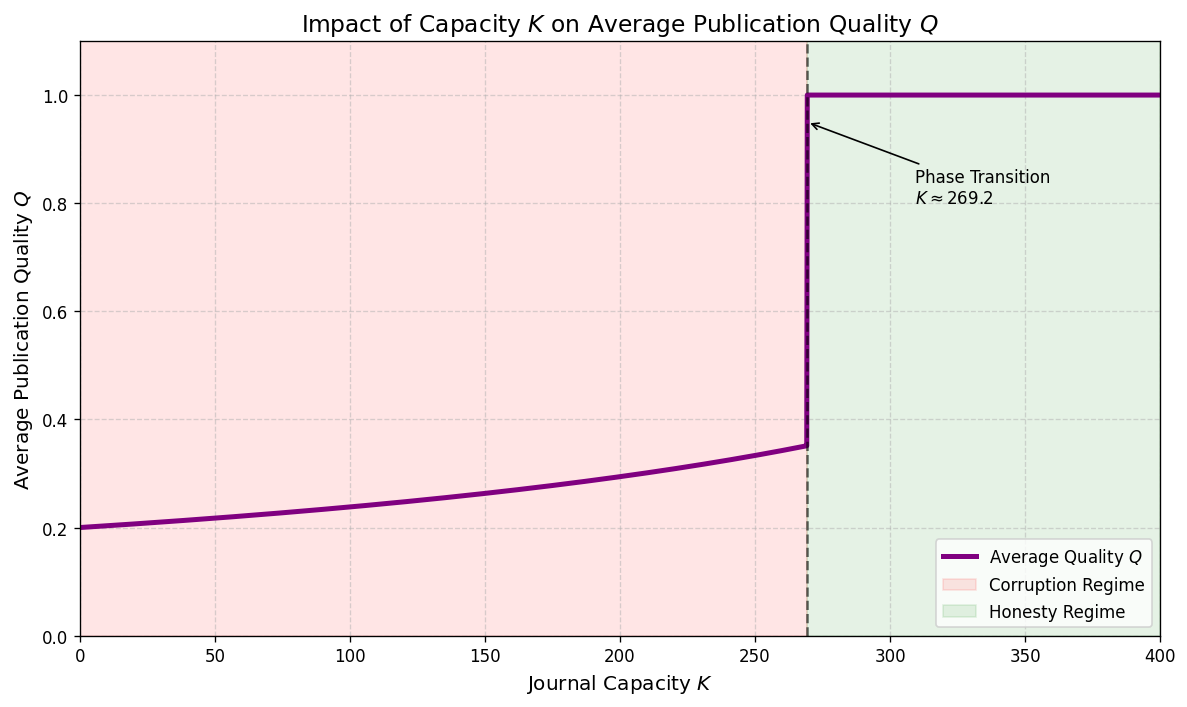

In [5]:
import numpy as np
import matplotlib.pyplot as plt

params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'alpha': 0.2,
    'C': 10,
    'B': 100,
    'D': 50,
    'C_J': 0.5
}

numerator = params['lam'] * params['B'] - params['C']
denominator = params['D'] + params['lam'] * params['B']
sigma_star = numerator / denominator
K_crit = sigma_star * (params['N'] * params['C_J'] + params['epsilon'])

K_values = np.linspace(0, 400, 2000)
Q_values = []

for K in K_values:
    term_bracket = (K / sigma_star - params['epsilon']) / (params['N'] * params['C_J'])
    x_star = (1 / (1 - params['alpha'])) * (1 - term_bracket)

    if x_star < 0:
        Q = 1.0
    else:
        V_total = params['N']
        sigma_realized = min(1, K / (params['C_J'] * V_total + params['epsilon']))
        V_good_acc = params['N'] * params['alpha']
        V_bad_acc = params['N'] * (1 - params['alpha']) * (1 - sigma_realized)
        Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)

plt.figure(figsize=(10, 6), dpi=120)

plt.plot(K_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')

plt.axvspan(0, K_crit, color='red', alpha=0.1, label='Corruption Regime')
plt.axvspan(K_crit, 400, color='green', alpha=0.1, label='Honesty Regime')
plt.axvline(K_crit, color='black', linestyle='--', alpha=0.6)

plt.annotate(f'Phase Transition\n$K \\approx {K_crit:.1f}$',
             xy=(K_crit, 0.95), xytext=(K_crit + 40, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.title(r'Impact of Capacity $K$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Journal Capacity $K$', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.1)
plt.xlim(0, 400)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

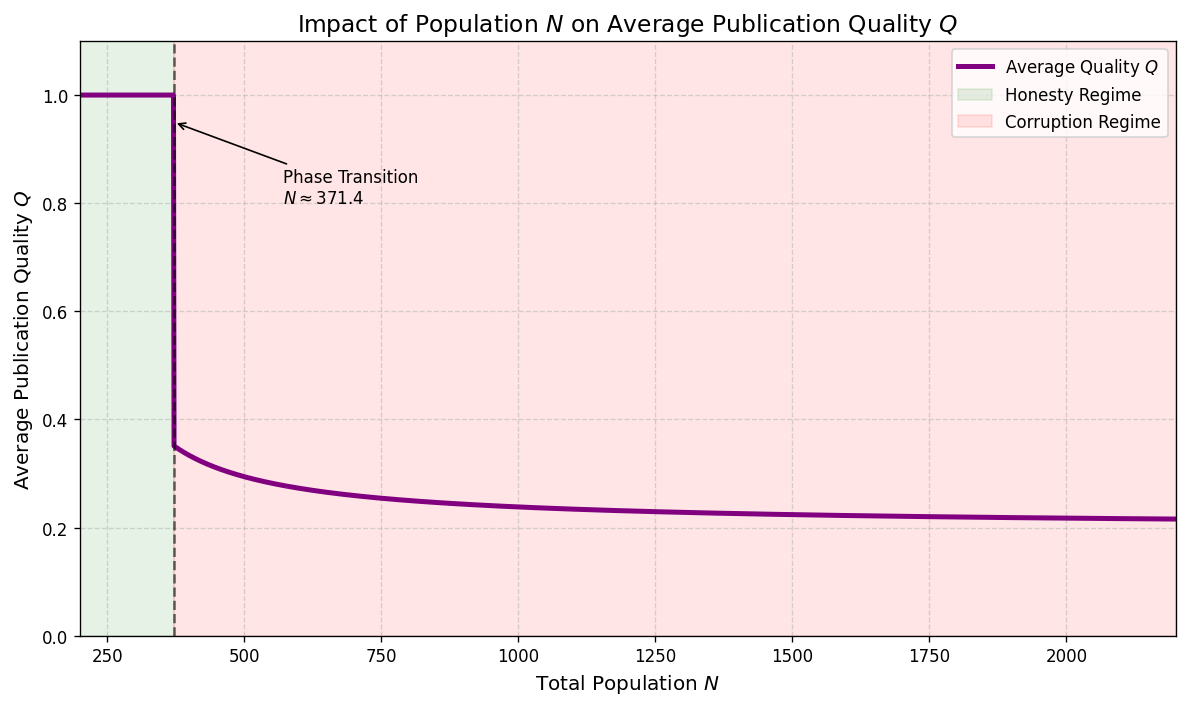

In [6]:
params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'K': 100,
    'alpha': 0.2,
    'C': 10,
    'B': 100,
    'D': 50,
    'C_J': 0.5
}

numerator = params['lam'] * params['B'] - params['C']
denominator = params['D'] + params['lam'] * params['B']
sigma_star = numerator / denominator
N_crit = (params['K'] / sigma_star - params['epsilon']) / params['C_J']

N_values = np.linspace(200, 2200, 2000)
Q_values = []

for N in N_values:
    term_bracket = (params['K'] / sigma_star - params['epsilon']) / (N * params['C_J'])
    x_star = (1 / (1 - params['alpha'])) * (1 - term_bracket)

    if x_star < 0:
        Q = 1.0
    else:
        V_total = N
        sigma_realized = min(1, params['K'] / (params['C_J'] * V_total + params['epsilon']))
        V_good_acc = N * params['alpha']
        V_bad_acc = N * (1 - params['alpha']) * (1 - sigma_realized)
        Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)

plt.figure(figsize=(10, 6), dpi=120)

plt.plot(N_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')

plt.axvspan(200, N_crit, color='green', alpha=0.1, label='Honesty Regime')
plt.axvspan(N_crit, 2200, color='red', alpha=0.1, label='Corruption Regime')
plt.axvline(N_crit, color='black', linestyle='--', alpha=0.6)

plt.annotate(f'Phase Transition\n$N \\approx {N_crit:.1f}$',
             xy=(N_crit, 0.95), xytext=(N_crit + 200, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.title(r'Impact of Population $N$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Total Population $N$', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.1)
plt.xlim(200, 2200)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

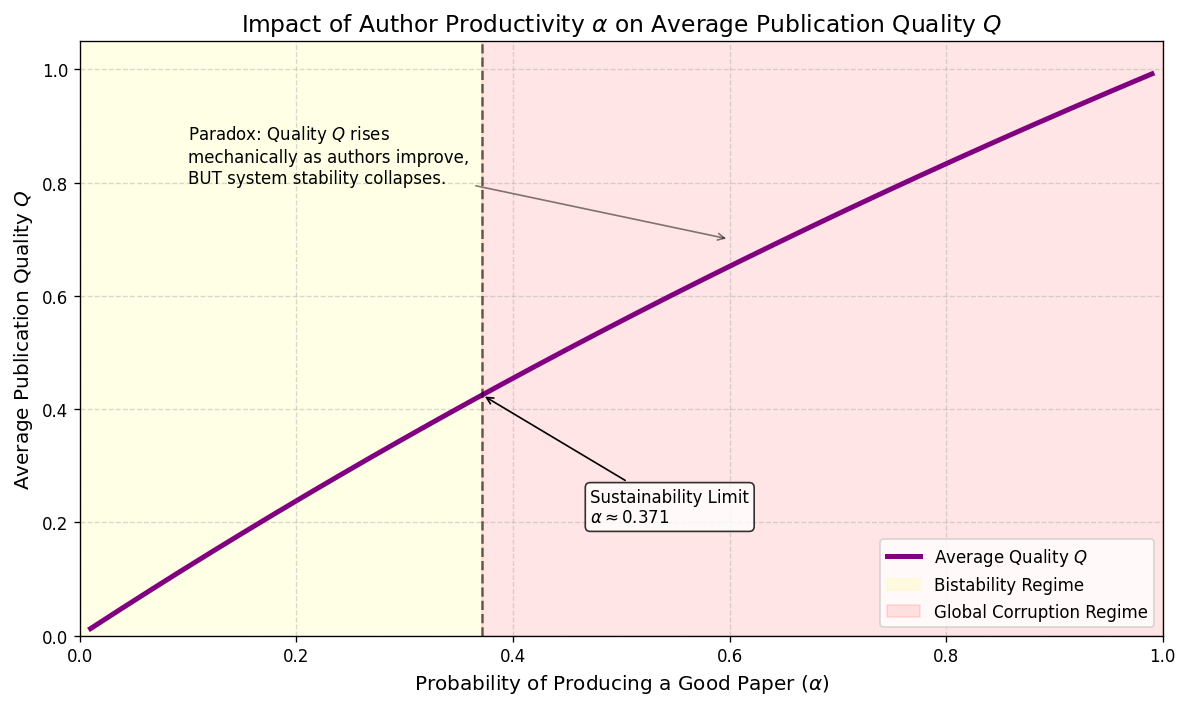

In [7]:
params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'K': 100,
    'alpha': 0.2, # Variable in loop
    'C': 10,
    'B': 100,
    'D': 50,
    'C_J': 0.5
}


numerator = params['lam'] * params['B'] - params['C']
denominator = params['D'] + params['lam'] * params['B']
sigma_star = numerator / denominator


V_crit = (params['K'] / sigma_star - params['epsilon']) / params['C_J']
alpha_crit = V_crit / params['N']


alpha_values = np.linspace(0.01, 0.99, 2000)
Q_values = []

for alpha in alpha_values:

    term_A = V_crit / params['N']
    x_star = (1 - term_A) / (1 - alpha)


    if x_star < 0:

        Q = 1.0
    else:

        V_total = params['N']
        sigma_realized = min(1, params['K'] / (params['C_J'] * V_total + params['epsilon']))

        V_good_acc = params['N'] * alpha
        V_bad_acc = params['N'] * (1 - alpha) * (1 - sigma_realized)

        Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)

plt.figure(figsize=(10, 6), dpi=120)

plt.plot(alpha_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')


plt.axvspan(0, alpha_crit, color='yellow', alpha=0.1, label='Bistability Regime')
plt.axvspan(alpha_crit, 1.0, color='red', alpha=0.1, label='Global Corruption Regime')
plt.axvline(alpha_crit, color='black', linestyle='--', alpha=0.6)


plt.annotate(f'Sustainability Limit\n$\\alpha \\approx {alpha_crit:.3f}$',
             xy=(alpha_crit, Q_values[np.searchsorted(alpha_values, alpha_crit)]),
             xytext=(alpha_crit + 0.1, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))


plt.annotate('Paradox: Quality $Q$ rises\nmechanically as authors improve,\nBUT system stability collapses.',
             xy=(0.6, 0.7), xytext=(0.1, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5),
             fontsize=10)

plt.title(r'Impact of Author Productivity $\alpha$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Probability of Producing a Good Paper ($\alpha$)', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.05)
plt.xlim(0, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

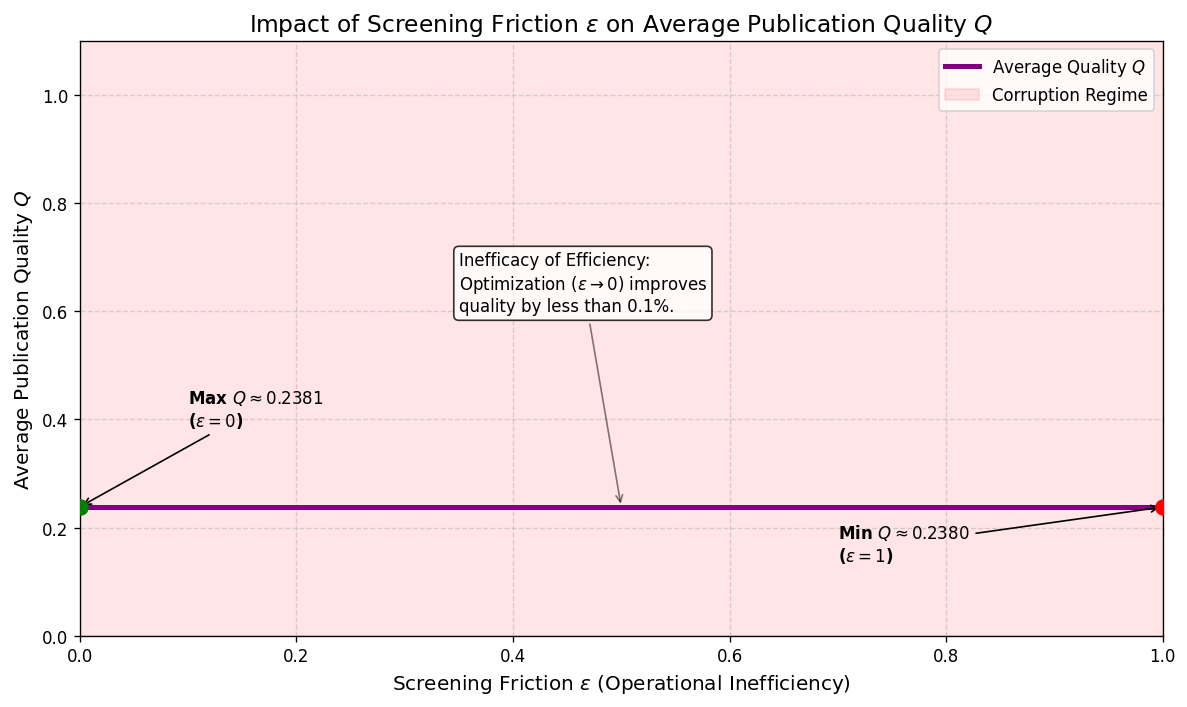

In [9]:
params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'K': 100,
    'alpha': 0.2,
    'C': 10,
    'B': 100,
    'D': 50,
    'C_J': 0.5
}

numerator = params['lam'] * params['B'] - params['C']
denominator = params['D'] + params['lam'] * params['B']
sigma_star = numerator / denominator

epsilon_values = np.linspace(0, 1.0, 1000)
Q_values = []

for eps in epsilon_values:
    term = (params['K'] / sigma_star - eps) / (params['N'] * params['C_J'])
    x_star = (1 - term) / (1 - params['alpha'])

    if x_star < 0:
        Q = 1.0
    else:
        V_total = params['N']
        sigma_realized = min(1, params['K'] / (params['C_J'] * V_total + eps))
        V_good_acc = params['N'] * params['alpha']
        V_bad_acc = params['N'] * (1 - params['alpha']) * (1 - sigma_realized)
        Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)

max_idx = np.argmax(Q_values)
min_idx = np.argmin(Q_values)
max_Q = Q_values[max_idx]
min_Q = Q_values[min_idx]
max_eps = epsilon_values[max_idx]
min_eps = epsilon_values[min_idx]

plt.figure(figsize=(10, 6), dpi=120)


plt.plot(epsilon_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')


plt.axvspan(0, 1.0, color='red', alpha=0.1, label='Corruption Regime')


plt.scatter([max_eps], [max_Q], color='green', s=80, zorder=5)
plt.annotate(f'Max $Q \\approx {max_Q:.4f}$\n($\\epsilon=0$)',
             xy=(max_eps, max_Q), xytext=(max_eps + 0.1, max_Q + 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, fontweight='bold')


plt.scatter([min_eps], [min_Q], color='red', s=80, zorder=5)
plt.annotate(f'Min $Q \\approx {min_Q:.4f}$\n($\\epsilon=1$)',
             xy=(min_eps, min_Q), xytext=(min_eps - 0.3, min_Q - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, fontweight='bold')


plt.annotate('Inefficacy of Efficiency:\nOptimization ($\\epsilon \\to 0$) improves\nquality by less than 0.1%.',
             xy=(0.5, (max_Q + min_Q)/2), xytext=(0.35, 0.6),
             arrowprops=dict(facecolor='black', arrowstyle='->', alpha=0.5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))

plt.title(r'Impact of Screening Friction $\epsilon$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Screening Friction $\epsilon$ (Operational Inefficiency)', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.1)
plt.xlim(0, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

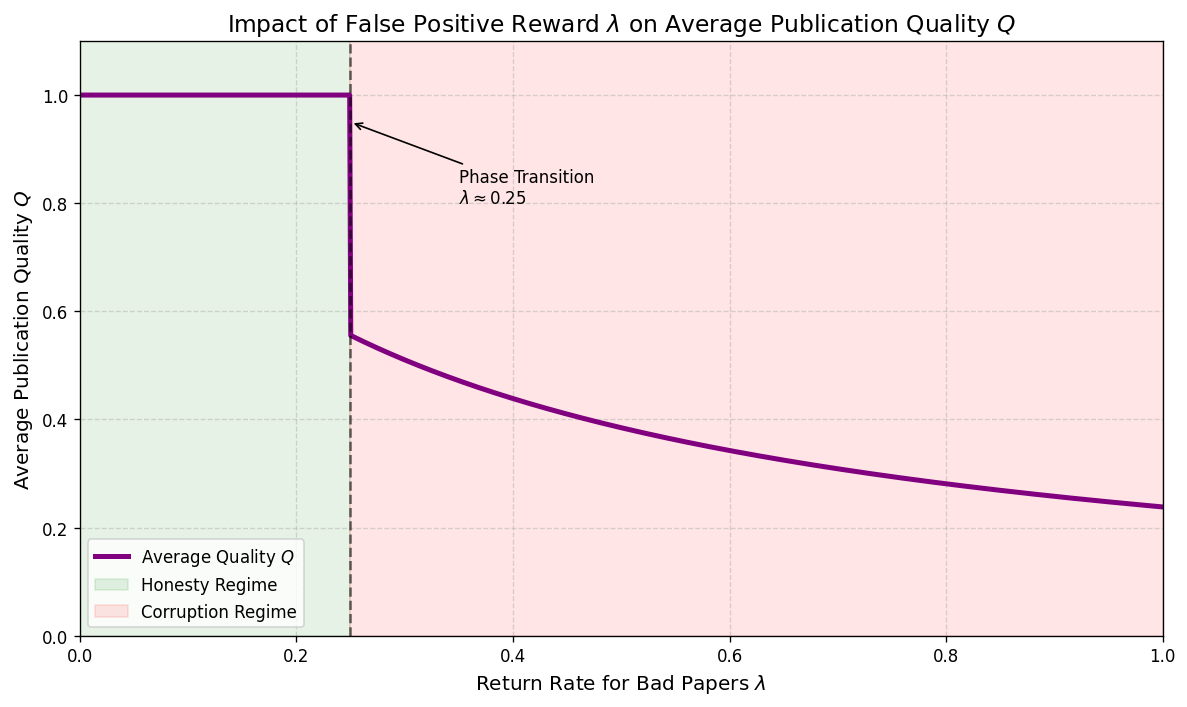

In [10]:
params = {
    'epsilon': 0.01,
    'lam': 0.8, # Variable
    'N': 1000,
    'K': 100,
    'alpha': 0.2,
    'C': 10,
    'B': 100,
    'D': 50,
    'C_J': 0.5
}


lam_values = np.linspace(0, 1.0, 1000)
Q_values = []


S = params['K'] / (params['N'] * params['C_J'] + params['epsilon'])
numerator_crit = params['C'] + S * params['D']
denominator_crit = params['B'] * (1 - S)
lam_crit = numerator_crit / denominator_crit

for lam in lam_values:

    if lam * params['B'] <= params['C']:

        x_star = -1.0
    else:
        numerator = lam * params['B'] - params['C']
        denominator = params['D'] + lam * params['B']
        sigma_star = numerator / denominator


        term = (params['K'] / sigma_star - params['epsilon']) / (params['N'] * params['C_J'])
        x_star = (1 - term) / (1 - params['alpha'])


    if x_star < 0:

        Q = 1.0
    else:

        V_total = params['N']
        sigma_realized = min(1, params['K'] / (params['C_J'] * V_total + params['epsilon']))

        V_good_acc = params['N'] * params['alpha']

        V_bad_acc = params['N'] * (1 - params['alpha']) * (1 - sigma_realized) * lam

        Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)


plt.figure(figsize=(10, 6), dpi=120)

plt.plot(lam_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')


plt.axvspan(0, lam_crit, color='green', alpha=0.1, label='Honesty Regime')
plt.axvspan(lam_crit, 1.0, color='red', alpha=0.1, label='Corruption Regime')
plt.axvline(lam_crit, color='black', linestyle='--', alpha=0.6)


plt.annotate(f'Phase Transition\n$\\lambda \\approx {lam_crit:.2f}$',
             xy=(lam_crit, 0.95), xytext=(lam_crit + 0.1, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.title(r'Impact of False Positive Reward $\lambda$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Return Rate for Bad Papers $\lambda$', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.1)
plt.xlim(0, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

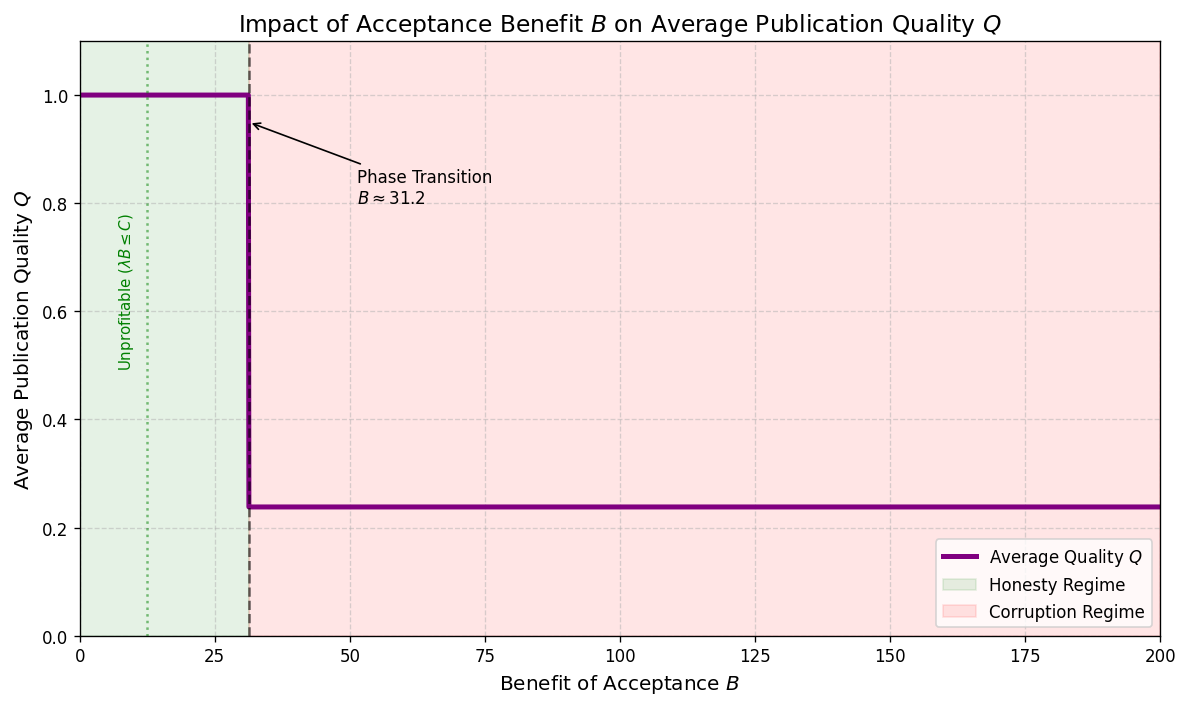

In [11]:
params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'K': 100,
    'alpha': 0.2,
    'C': 10,
    'D': 50,
    'C_J': 0.5
}

B_values = np.linspace(0, 200, 2000)
Q_values = []


S = params['K'] / (params['N'] * params['C_J'] + params['epsilon']) # ~ 0.2
numerator_crit = params['C'] + S * params['D']
denominator_crit = params['lam'] * (1 - S)
B_crit = numerator_crit / denominator_crit # ~ 31.25


B_profit = params['C'] / params['lam'] # 12.5

for B in B_values:

    if params['lam'] * B <= params['C']:
        x_star = -1.0
    else:

        numerator = params['lam'] * B - params['C']
        denominator = params['D'] + params['lam'] * B
        sigma_star = numerator / denominator

        term = (params['K'] / sigma_star - params['epsilon']) / (params['N'] * params['C_J'])
        x_star = (1 - term) / (1 - params['alpha'])


    if x_star < 0:
        Q = 1.0
    else:

        V_total = params['N']
        sigma_realized = min(1, params['K'] / (params['C_J'] * V_total + params['epsilon']))
        V_good_acc = params['N'] * params['alpha']

        V_bad_acc = params['N'] * (1 - params['alpha']) * (1 - sigma_realized)

        Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)


plt.figure(figsize=(10, 6), dpi=120)

plt.plot(B_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')


plt.axvspan(0, B_crit, color='green', alpha=0.1, label='Honesty Regime')
plt.axvspan(B_crit, 200, color='red', alpha=0.1, label='Corruption Regime')

plt.axvline(B_crit, color='black', linestyle='--', alpha=0.6)


plt.annotate(f'Phase Transition\n$B \\approx {B_crit:.1f}$',
             xy=(B_crit, 0.95), xytext=(B_crit + 20, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)


plt.axvline(B_profit, color='green', linestyle=':', alpha=0.5)
plt.text(B_profit - 2, 0.5, r'Unprofitable ($\lambda B \leq C$)', rotation=90, color='green', ha='right', fontsize=9)

plt.title(r'Impact of Acceptance Benefit $B$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Benefit of Acceptance $B$', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.1)
plt.xlim(0, 200)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

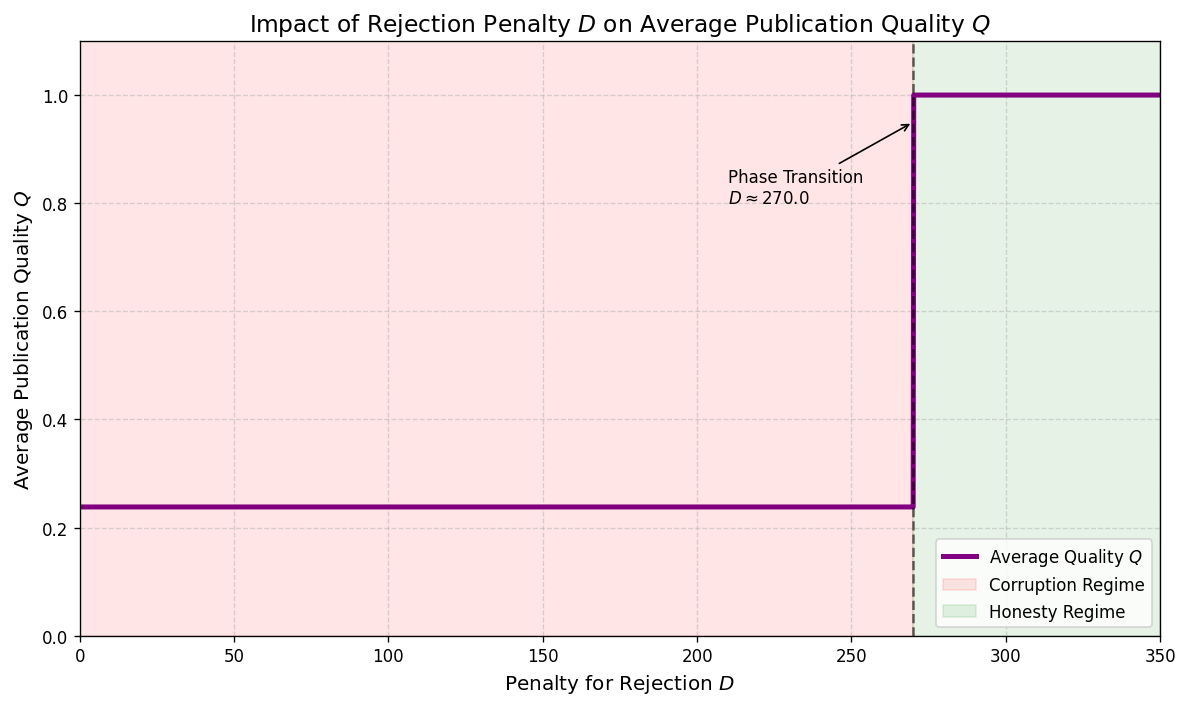

In [12]:

params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'K': 100,
    'alpha': 0.2,
    'C': 10,
    'B': 100,
    'D': 50, # This will vary
    'C_J': 0.5
}


D_values = np.linspace(0, 350, 2000)
Q_values = []


S = params['K'] / (params['N'] * params['C_J'] + params['epsilon']) # ~ 0.2
numerator_crit = params['lam'] * params['B'] * (1 - S) - params['C']
D_crit = numerator_crit / S

for D in D_values:

    numerator = params['lam'] * params['B'] - params['C']
    denominator = D + params['lam'] * params['B']
    sigma_star = numerator / denominator

    term = (params['K'] / sigma_star - params['epsilon']) / (params['N'] * params['C_J'])
    x_star = (1 - term) / (1 - params['alpha'])


    if x_star < 0:
        Q = 1.0
    else:

        V_total = params['N']
        sigma_realized = min(1, params['K'] / (params['C_J'] * V_total + params['epsilon']))
        V_good_acc = params['N'] * params['alpha']

        V_bad_acc = params['N'] * (1 - params['alpha']) * (1 - sigma_realized)

        Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)


plt.figure(figsize=(10, 6), dpi=120)

plt.plot(D_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')


plt.axvspan(0, D_crit, color='red', alpha=0.1, label='Corruption Regime')

plt.axvspan(D_crit, 350, color='green', alpha=0.1, label='Honesty Regime')

plt.axvline(D_crit, color='black', linestyle='--', alpha=0.6)


plt.annotate(f'Phase Transition\n$D \\approx {D_crit:.1f}$',
             xy=(D_crit, 0.95), xytext=(D_crit - 60, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.title(r'Impact of Rejection Penalty $D$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Penalty for Rejection $D$', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.1)
plt.xlim(0, 350)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('quality_D.pdf')
plt.show()

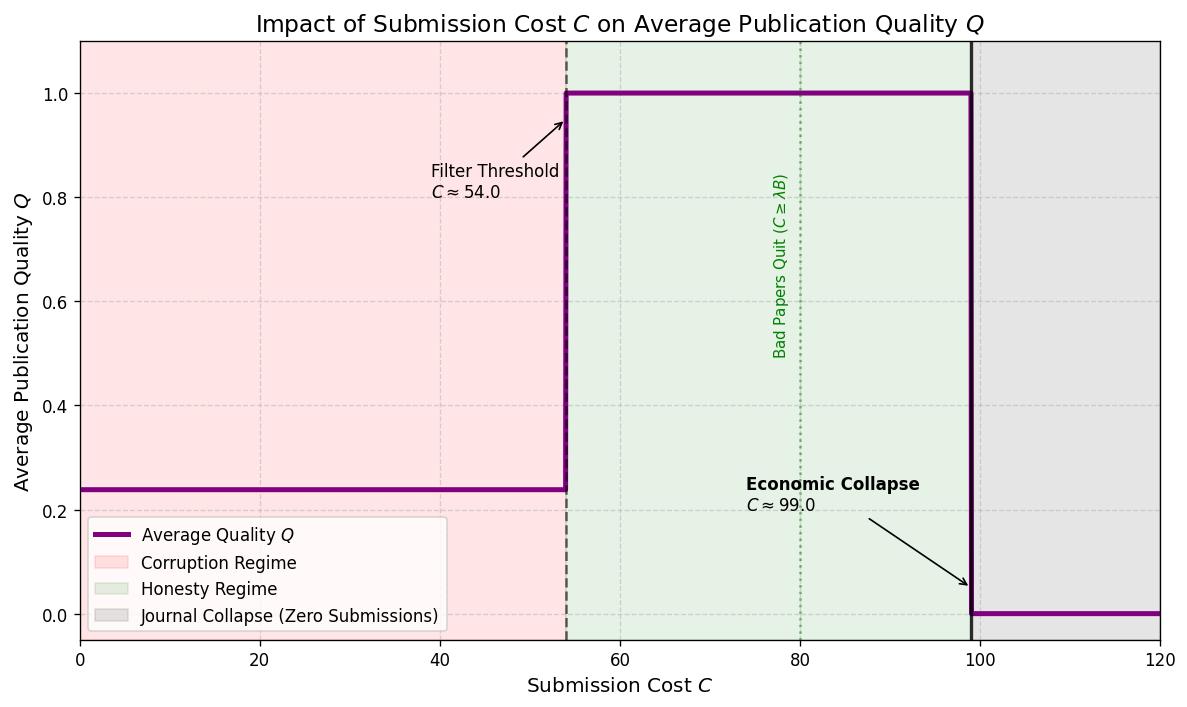

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. Parameter Settings
# ==========================================
params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'K': 100,
    'alpha': 0.2,
    # 'C': Variable,
    'B': 100,
    'D': 50,
    'C_J': 0.5
}

# ==========================================
# 2. Calculation Logic
# ==========================================

# Variable C range
# Extended to 120 to clearly show the Death region (Threshold is ~99)
C_values = np.linspace(0, 120, 2000)
Q_values = []

# Calculate Critical thresholds
# 1. Phase Transition (Corruption -> Honesty)
S = params['K'] / (params['N'] * params['C_J'] + params['epsilon']) # ~ 0.2
C_crit = params['lam'] * params['B'] * (1 - S) - S * params['D']

# 2. Profitability Threshold (Bad Papers stop)
C_profit = params['lam'] * params['B'] # 80.0

# 3. Death Threshold (Good Papers stop)
# Profit_good = B * (1 - epsilon) - C. If < 0, good authors quit.
C_death = params['B'] * (1 - params['epsilon']) # 99.0

for C in C_values:

    # Check 1: Is it profitable for ANYONE? (Good authors check)
    if C >= C_death:
        # Even good papers are unprofitable.
        # Volume = 0. Journal collapses.
        # We set Q=0 to visualize the "Death" of the journal.
        Q = 0.0

    else:
        # Good papers are profitable. Now check Bad papers.

        # Check 2: Is it profitable for CHEATERS?
        if C >= C_profit:
            # Bad papers are unprofitable.
            # Strategy: Unconditional Honesty (x* = -1.0)
            x_star = -1.0
        else:
            # Bad papers are profitable. Calculate Equilibrium x*.
            numerator = params['lam'] * params['B'] - C
            denominator = params['D'] + params['lam'] * params['B']
            sigma_star = numerator / denominator

            term = (params['K'] / sigma_star - params['epsilon']) / (params['N'] * params['C_J'])
            x_star = (1 - term) / (1 - params['alpha'])

        # Calculate Q based on x*
        if x_star < 0:
            # Honesty Regime (Only Good papers submitted)
            Q = 1.0
        else:
            # Corruption Regime
            V_total = params['N']
            sigma_realized = min(1, params['K'] / (params['C_J'] * V_total + params['epsilon']))
            V_good_acc = params['N'] * params['alpha']
            V_bad_acc = params['N'] * (1 - params['alpha']) * (1 - sigma_realized)

            Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)

# ==========================================
# 3. Plotting
# ==========================================
plt.figure(figsize=(10, 6), dpi=120)

plt.plot(C_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')

# --- Highlight Regions ---

# 1. Corruption Zone (Red)
plt.axvspan(0, C_crit, color='red', alpha=0.1, label='Corruption Regime')

# 2. Honesty Zone (Green)
# Between Phase Transition and Death
plt.axvspan(C_crit, C_death, color='green', alpha=0.1, label='Honesty Regime')

# 3. Collapse Zone (Gray)
plt.axvspan(C_death, 120, color='gray', alpha=0.2, label='Journal Collapse (Zero Submissions)')

# --- Lines & Annotations ---

# Phase Transition Line
plt.axvline(C_crit, color='black', linestyle='--', alpha=0.6)
plt.annotate(f'Filter Threshold\n$C \\approx {C_crit:.1f}$',
             xy=(C_crit, 0.95), xytext=(C_crit - 15, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Unprofitable (Bad) Line
plt.axvline(C_profit, color='green', linestyle=':', alpha=0.5)
plt.text(C_profit - 1, 0.5, r'Bad Papers Quit ($C \geq \lambda B$)', rotation=90, color='green', ha='right', fontsize=9)

# Death (Good) Line
plt.axvline(C_death, color='black', linestyle='-', linewidth=2, alpha=0.8)
plt.annotate(f'Economic Collapse\n$C \\approx {C_death:.1f}$',
             xy=(C_death, 0.05), xytext=(C_death - 25, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, fontweight='bold')

# Styling
plt.title(r'Impact of Submission Cost $C$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Submission Cost $C$', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(-0.05, 1.1)
plt.xlim(0, 120)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower left')

plt.tight_layout()
plt.savefig('quality_C_corrected.pdf')
plt.show()

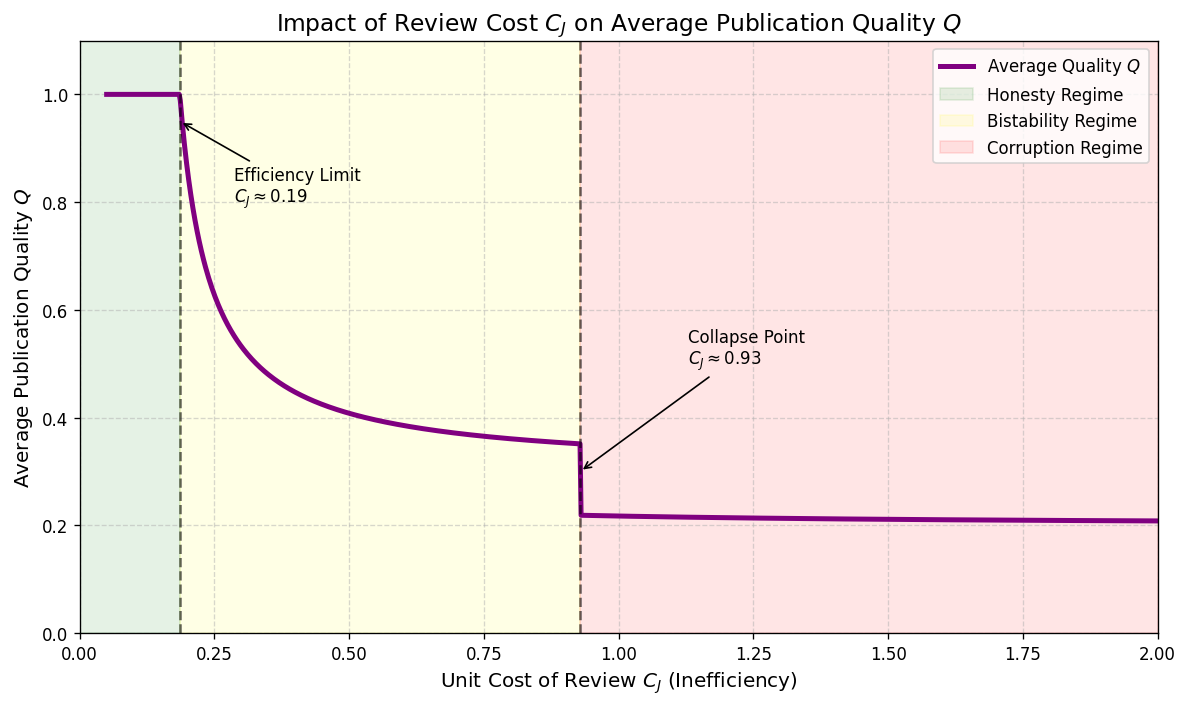

In [16]:

params = {
    'epsilon': 0.01,
    'lam': 0.8,
    'N': 1000,
    'K': 100,
    'alpha': 0.2,
    'C': 10,
    'B': 100,
    'D': 50,

}


CJ_values = np.linspace(0.05, 2.0, 1000)
Q_values = []


numerator = params['lam'] * params['B'] - params['C']
denominator = params['D'] + params['lam'] * params['B']
sigma_star_target = numerator / denominator


CJ_crit_0 = (params['K'] / sigma_star_target - params['epsilon']) / params['N']


CJ_crit_1 = CJ_crit_0 / params['alpha']

for CJ in CJ_values:

    A = (params['K'] / sigma_star_target - params['epsilon']) / params['N']
    x_star = (1 - A / CJ) / (1 - params['alpha'])


    if x_star < 0:

        Q = 1.0
    else:
        if x_star > 1:


            V_total = params['N']

            sigma_realized = min(1, params['K'] / (CJ * V_total + params['epsilon']))

            V_good_acc = params['N'] * params['alpha']
            V_bad_acc = params['N'] * (1 - params['alpha']) * (1 - sigma_realized)
            Q = V_good_acc / (V_good_acc + V_bad_acc)

        else:

            sigma_realized = sigma_star_target

            V_good_acc = params['N'] * params['alpha']

            V_bad_submitted = params['N'] * (1 - params['alpha']) * x_star
            V_bad_acc = V_bad_submitted * (1 - sigma_realized)

            Q = V_good_acc / (V_good_acc + V_bad_acc)

    Q_values.append(Q)


plt.figure(figsize=(10, 6), dpi=120)

plt.plot(CJ_values, Q_values, color='#800080', linewidth=3, label='Average Quality $Q$')


plt.axvspan(0, CJ_crit_0, color='green', alpha=0.1, label='Honesty Regime')


plt.axvspan(CJ_crit_0, CJ_crit_1, color='yellow', alpha=0.1, label='Bistability Regime')


plt.axvspan(CJ_crit_1, 2.0, color='red', alpha=0.1, label='Corruption Regime')


plt.axvline(CJ_crit_0, color='black', linestyle='--', alpha=0.6)
plt.axvline(CJ_crit_1, color='black', linestyle='--', alpha=0.6)


plt.annotate(f'Efficiency Limit\n$C_J \\approx {CJ_crit_0:.2f}$',
             xy=(CJ_crit_0, 0.95), xytext=(CJ_crit_0 + 0.1, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.annotate(f'Collapse Point\n$C_J \\approx {CJ_crit_1:.2f}$',
             xy=(CJ_crit_1, 0.3), xytext=(CJ_crit_1 + 0.2, 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.title(r'Impact of Review Cost $C_J$ on Average Publication Quality $Q$', fontsize=14)
plt.xlabel(r'Unit Cost of Review $C_J$ (Inefficiency)', fontsize=12)
plt.ylabel(r'Average Publication Quality $Q$', fontsize=12)
plt.ylim(0, 1.1)
plt.xlim(0, 2.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('quality_CJ.pdf')
plt.show()